### First attempt at cleaning scheduled rent
The problem is that at random points of time the scheduled rent is either entered for the entire unit, for the actual bed itself.
Moreover sometimes this happens in the middle, sometimes at the start, sometimes at the end \
Other times, the amount is plain wrong (i.e. there are times where a 1bedroom is being charged $3500 for a majority of the time horizon) \
The fastest workaround is to basically apply a ceiling to replace these estimates with something more reasonable (i.e. an average asking price based on bedroom size)

In [23]:
import pandas as pd
import numpy as np
import os

# Rent caps per bedroom count
caps = {0: 2000, 1: 2000, 2: 1600, 3: 1500, 4: 1400, 5: 1300, 6: 1200}  # per-bedroom caps
rent_col = "Scheduled Rent"  # Default column for rent
# Function to cap rent based on bedroom count
def cap_rent(row):
   br = int(row["Bedroom Count"])
   r  = row[rent_col]
   cap = caps.get(br, np.inf)  # leave untouched if bedroom count not in dict
   return min(max(r, 400), cap)

df = pd.DataFrame()

# Iterate over all CSV files and fix the scheduled rent so it's actually analyzable
files = os.listdir("Properties")
for file in files:
    temp_df = pd.read_csv("Properties/"+file, low_memory=False)

    temp_df["Scheduled Rent"] = pd.to_numeric(temp_df["Scheduled Rent"], errors="coerce")
    temp_df["Bedroom Count"]  = pd.to_numeric(temp_df["Bedroom Count"],  errors="coerce")

    # Drop nulls/zeros and out-of-range bedroom counts
    temp_df = temp_df[temp_df[rent_col].notna() & (temp_df[rent_col] > 0) & temp_df["Bedroom Count"].notna()]

    temp_df["Scheduled Rent (Capped)"] = temp_df.apply(cap_rent, axis=1)
    temp_df.to_csv("Properties_Cleaned_Rent/"+file, index=False)

df.to_csv("All_Properties_Capped.csv", index=False)

### Lease Length

Model summary for 17Hundred_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 2.864e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:35   Log-Likelihood:             2.6965e+05
No. Observations:              331989   AIC:                        -5.392e+05
Df Residuals:                  331967   BIC:                        -5.390e+05
Df Model:                          21                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


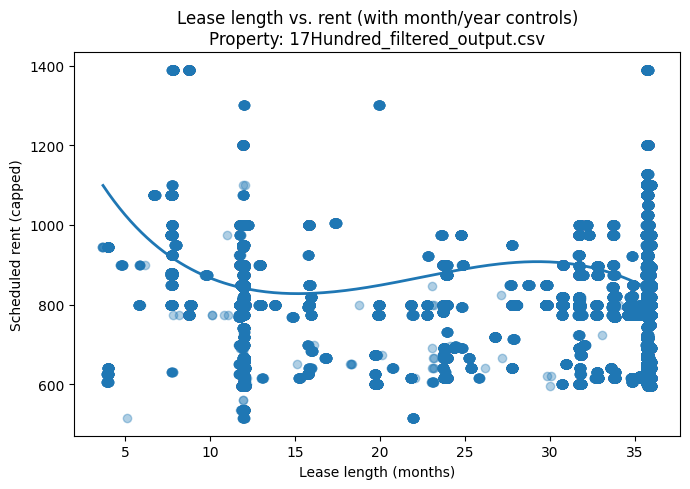

Model summary for 1Eleven_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1563.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:39   Log-Likelihood:                -29914.
No. Observations:              208620   AIC:                         5.987e+04
Df Residuals:                  208600   BIC:                         6.007e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


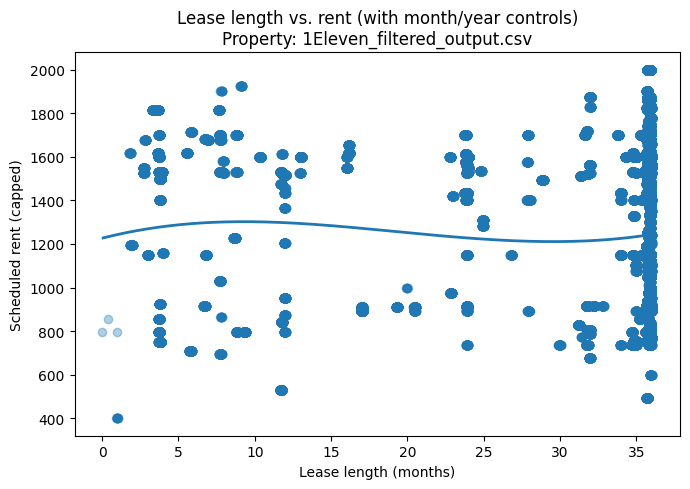

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 13
  warnings.warn('covariance of constraints does not have full '
c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


Model summary for 1Ten_on_Whyte_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                 2.493e+06
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:40   Log-Likelihood:                 7386.2
No. Observations:               42254   AIC:                        -1.474e+04
Df Residuals:                   42239   BIC:                        -1.461e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

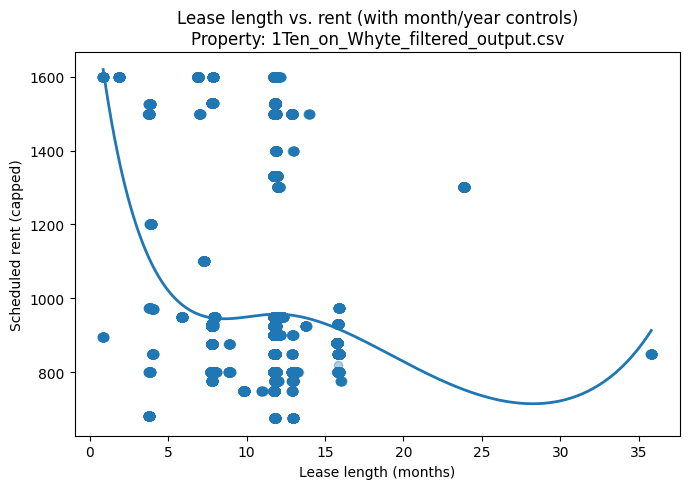

Model summary for 308_King_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     633.6
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:43   Log-Likelihood:             2.9371e+05
No. Observations:              206832   AIC:                        -5.874e+05
Df Residuals:                  206816   BIC:                        -5.872e+05
Df Model:                          15                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


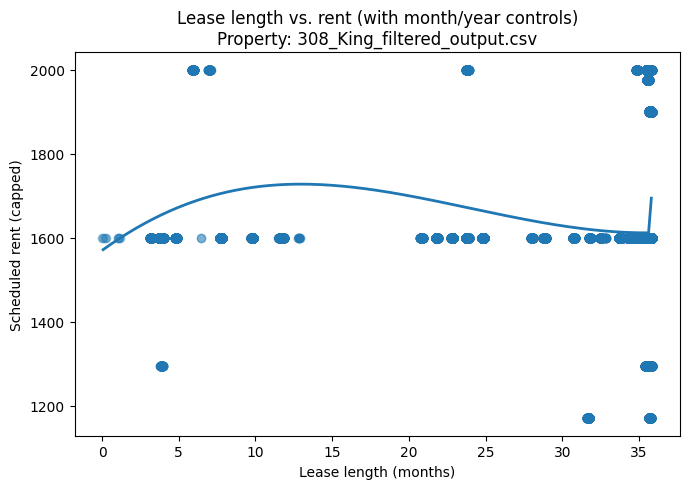

Model summary for 417Nelson_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                 1.326e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:44   Log-Likelihood:                 8533.6
No. Observations:               31736   AIC:                        -1.704e+04
Df Residuals:                   31720   BIC:                        -1.690e+04
Df Model:                          15                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


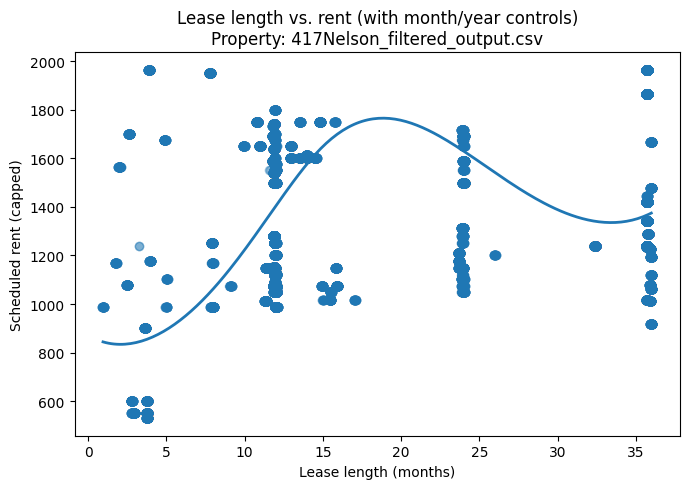

Model summary for ALMA_@_ByWard_Market_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1273.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:45   Log-Likelihood:                 28621.
No. Observations:              106666   AIC:                        -5.720e+04
Df Residuals:                  106647   BIC:                        -5.702e+04
Df Model:                          18                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


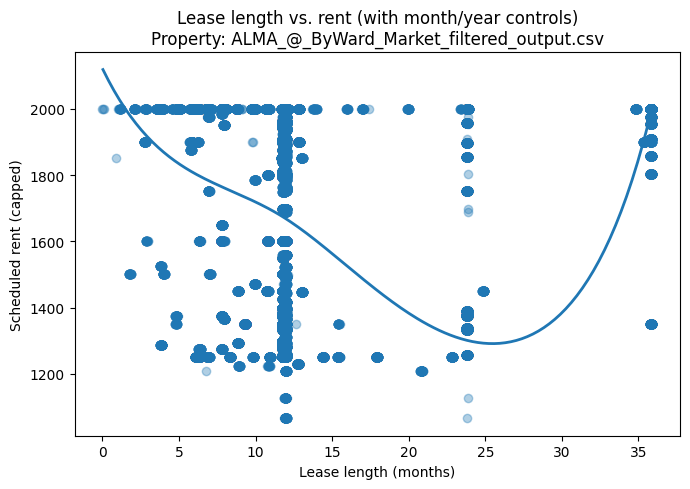

Model summary for ALMA_@_Guelph_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 4.731e+04
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:46   Log-Likelihood:             1.9809e+05
No. Observations:              119534   AIC:                        -3.961e+05
Df Residuals:                  119517   BIC:                        -3.960e+05
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


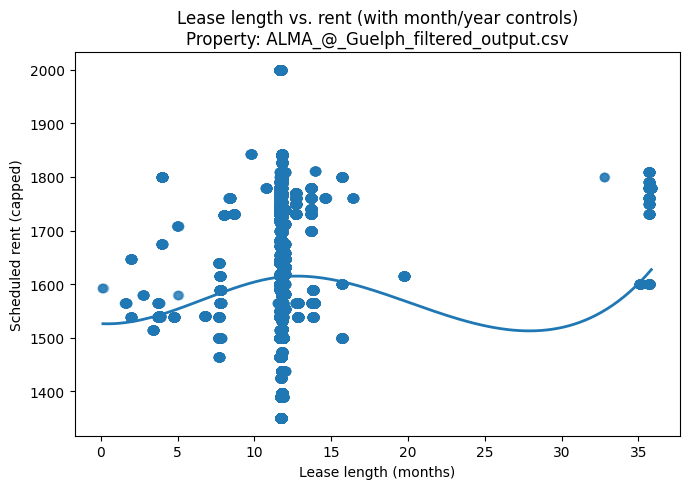

Model summary for ALMA_@_Oshawa_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:47   Log-Likelihood:                 72352.
No. Observations:               70362   AIC:                        -1.447e+05
Df Residuals:                   70342   BIC:                        -1.445e+05
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


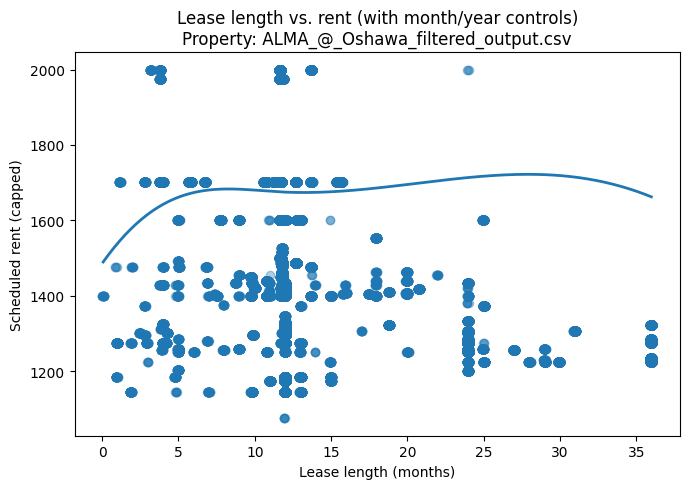

Model summary for ALMA_@_Shaughnessy_Village_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2082.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:48   Log-Likelihood:                 14427.
No. Observations:               55680   AIC:                        -2.882e+04
Df Residuals:                   55661   BIC:                        -2.865e+04
Df Model:                          18                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


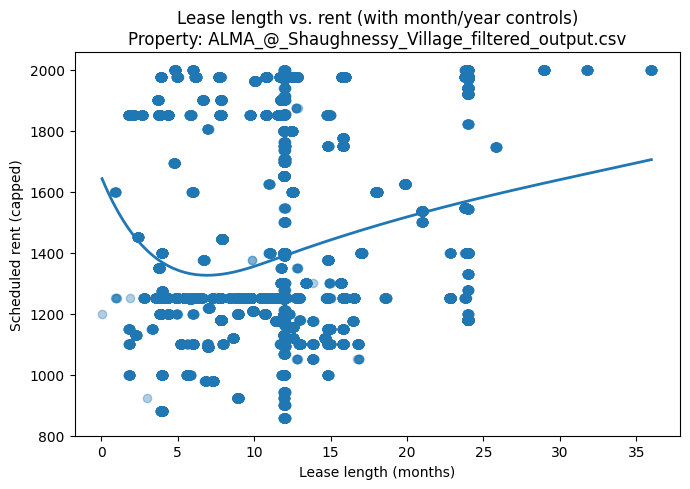

Model summary for ALMA_Latin_Quartier_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                      -1.848
Model:                            OLS   Adj. R-squared:                 -1.860
Method:                 Least Squares   F-statistic:                    0.5209
Date:                Thu, 21 Aug 2025   Prob (F-statistic):              0.471
Time:                        17:43:49   Log-Likelihood:                 1733.0
No. Observations:                3683   AIC:                            -3434.
Df Residuals:                    3667   BIC:                            -3335.
Df Model:                          15                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: Deprecat

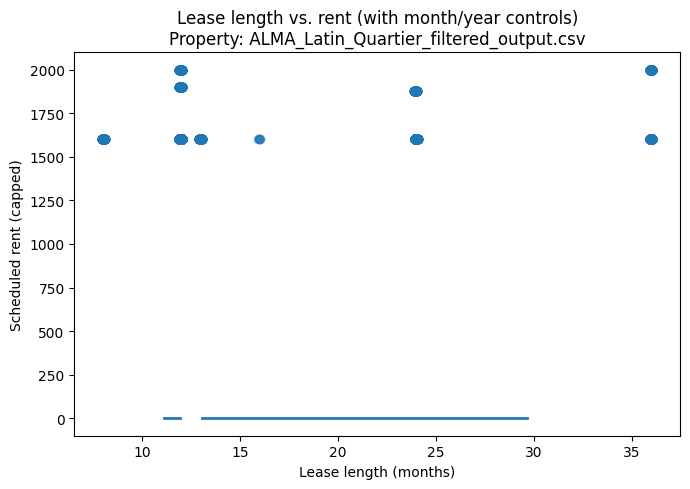

Model summary for ALMA_Sandy_Hill_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                 1.156e+06
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:49   Log-Likelihood:                 15750.
No. Observations:               12593   AIC:                        -3.147e+04
Df Residuals:                   12576   BIC:                        -3.134e+04
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


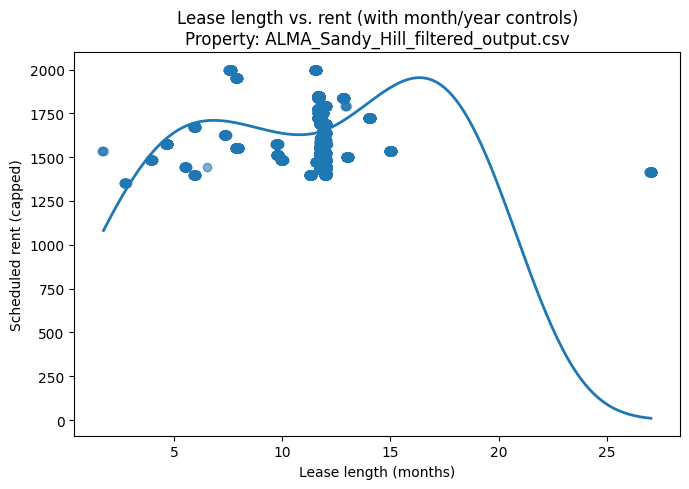

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 19, but rank is 18
  warnings.warn('covariance of constraints does not have full '
c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


Model summary for Bridgeport_House_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                 1.133e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:52   Log-Likelihood:             1.0883e+05
No. Observations:              298043   AIC:                        -2.176e+05
Df Residuals:                  298023   BIC:                        -2.174e+05
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

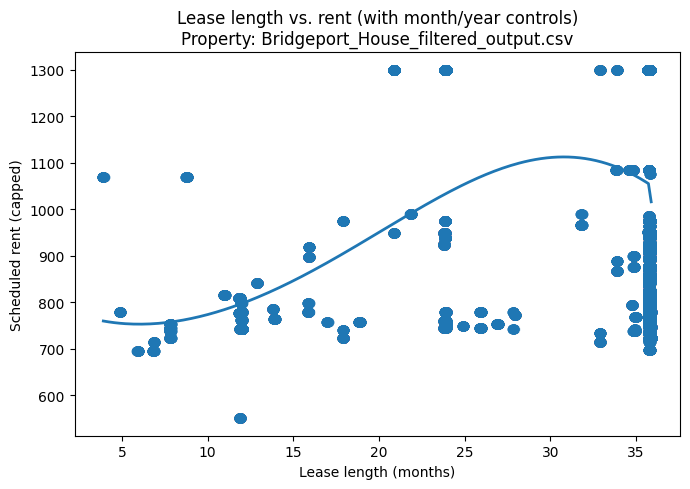

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 11
  warnings.warn('covariance of constraints does not have full '
c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


Model summary for Fergus_House_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 2.053e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:55   Log-Likelihood:             3.4510e+05
No. Observations:              177537   AIC:                        -6.902e+05
Df Residuals:                  177522   BIC:                        -6.900e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

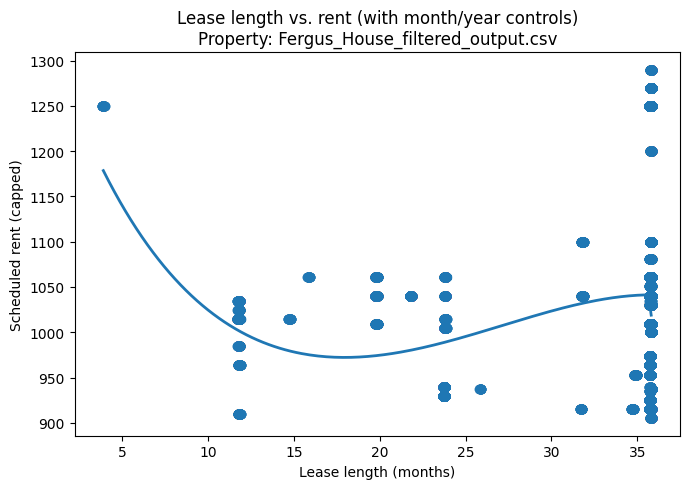

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  warnings.warn('covariance of constraints does not have full '
c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


Model summary for Hespeler_House_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                 1.575e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:57   Log-Likelihood:             1.2813e+05
No. Observations:              164812   AIC:                        -2.562e+05
Df Residuals:                  164799   BIC:                        -2.561e+05
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

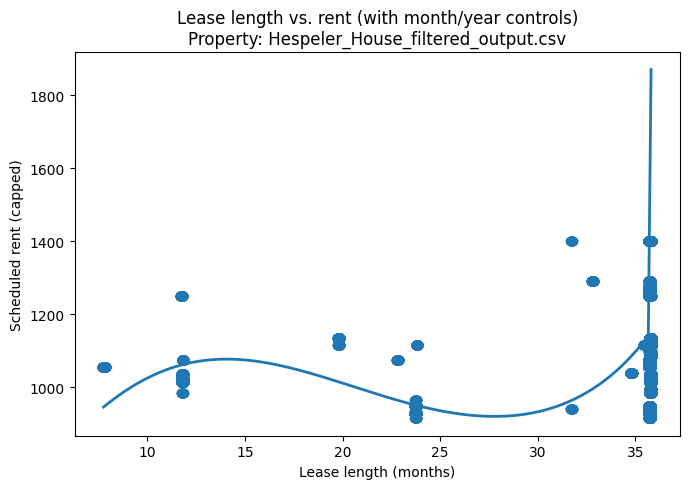

Model summary for King_Street_Towers_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                 2.035e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:03   Log-Likelihood:             1.8575e+05
No. Observations:              549520   AIC:                        -3.715e+05
Df Residuals:                  549502   BIC:                        -3.713e+05
Df Model:                          17                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


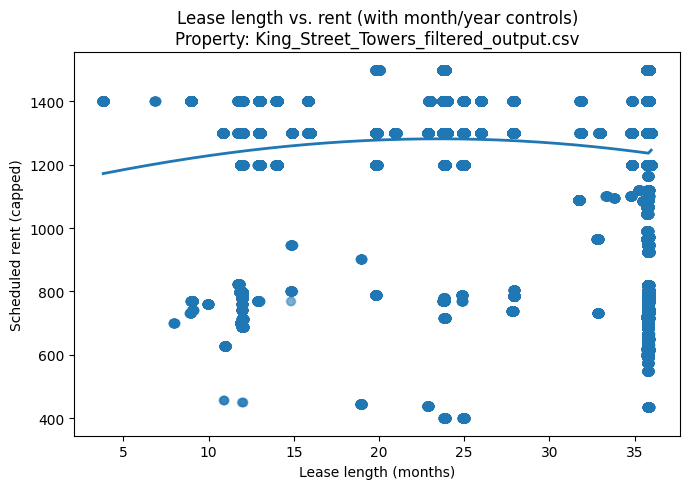

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 19, but rank is 17
  warnings.warn('covariance of constraints does not have full '
c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


Model summary for MyRez_on_Lester_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                 1.221e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:07   Log-Likelihood:             1.0778e+05
No. Observations:              262820   AIC:                        -2.155e+05
Df Residuals:                  262800   BIC:                        -2.153e+05
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

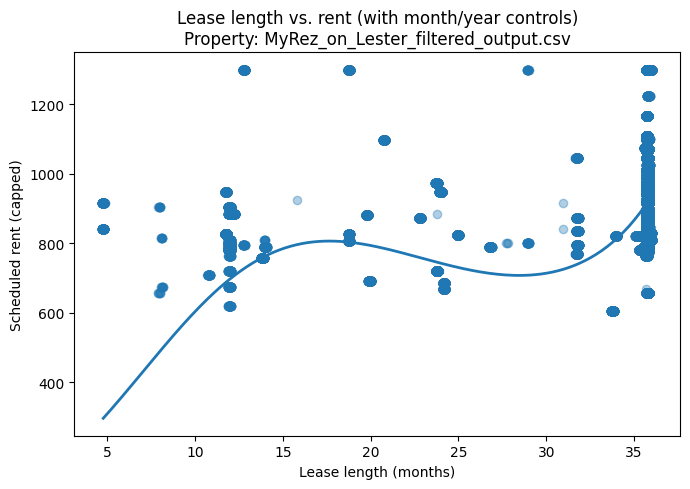

Model summary for Preston_House_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                 8.776e+04
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:10   Log-Likelihood:                 72176.
No. Observations:              188610   AIC:                        -1.443e+05
Df Residuals:                  188594   BIC:                        -1.442e+05
Df Model:                          15                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


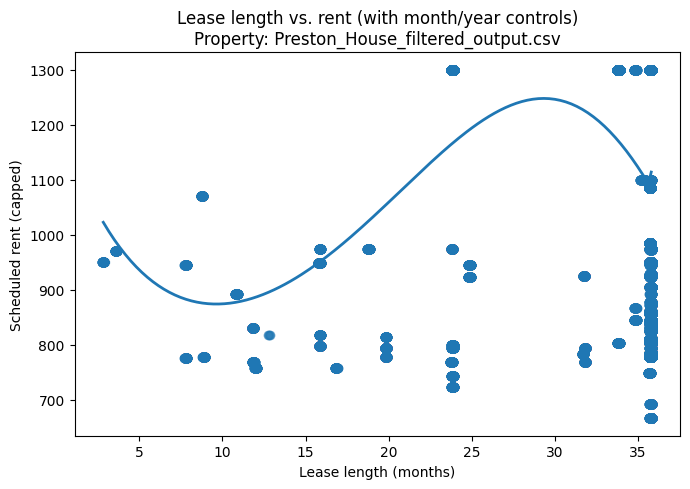

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 13
  warnings.warn('covariance of constraints does not have full '
c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


Model summary for See-More_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                 2.741e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:14   Log-Likelihood:             5.1788e+05
No. Observations:              368286   AIC:                        -1.036e+06
Df Residuals:                  368269   BIC:                        -1.036e+06
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

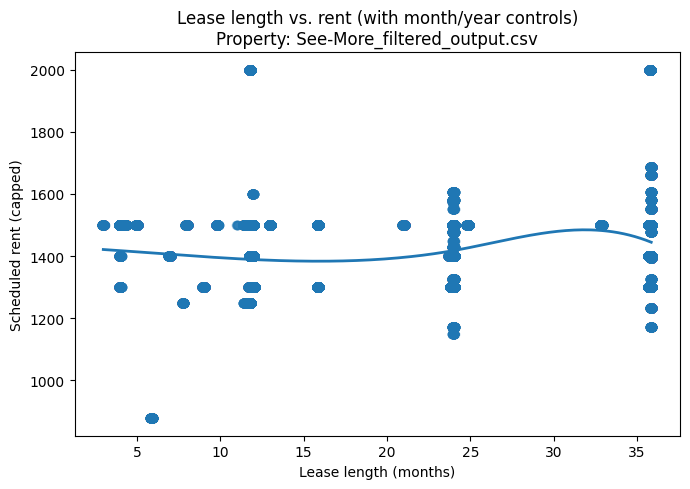

Model summary for The_Arc_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                 1.059e+04
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:18   Log-Likelihood:                 97881.
No. Observations:              305719   AIC:                        -1.957e+05
Df Residuals:                  305699   BIC:                        -1.955e+05
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


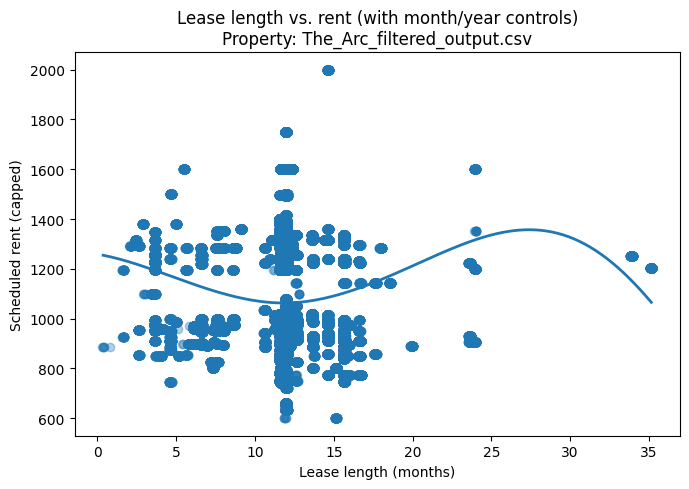

Model summary for The_Quad_at_York_Phase_1_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     6826.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:24   Log-Likelihood:             2.7932e+05
No. Observations:              514237   AIC:                        -5.586e+05
Df Residuals:                  514218   BIC:                        -5.584e+05
Df Model:                          18                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


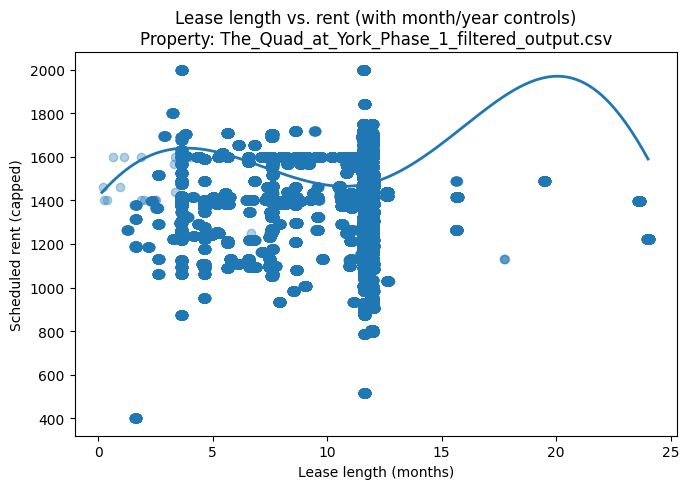

Model summary for The_Quad_at_York_Phase_2_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2169.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:30   Log-Likelihood:             4.1548e+05
No. Observations:              449964   AIC:                        -8.309e+05
Df Residuals:                  449945   BIC:                        -8.307e+05
Df Model:                          18                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


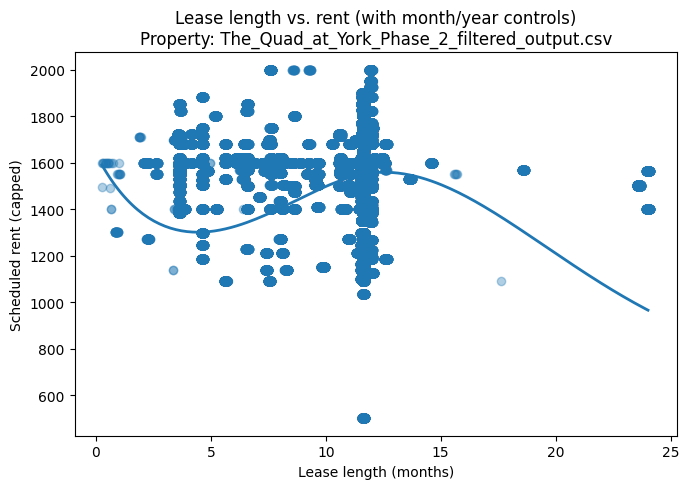

Model summary for West_Village_Suites_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 2.192e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:34   Log-Likelihood:             1.0470e+05
No. Observations:              238744   AIC:                        -2.094e+05
Df Residuals:                  238725   BIC:                        -2.092e+05
Df Model:                          18                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


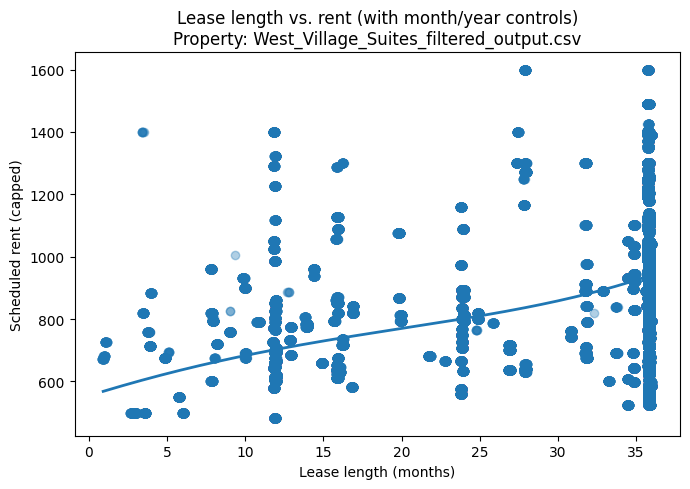

Model summary for Woodroffe_Place_filtered_output.csv:
                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     869.8
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:44:36   Log-Likelihood:                 30357.
No. Observations:              110936   AIC:                        -6.068e+04
Df Residuals:                  110917   BIC:                        -6.049e+04
Df Model:                          18                                         
Covariance Type:                  HC1                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

c:\Users\JackE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\JackE\AppData\Local\Temp\ipykernel_29476\2273025068.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "F": float(wald.fvalue),


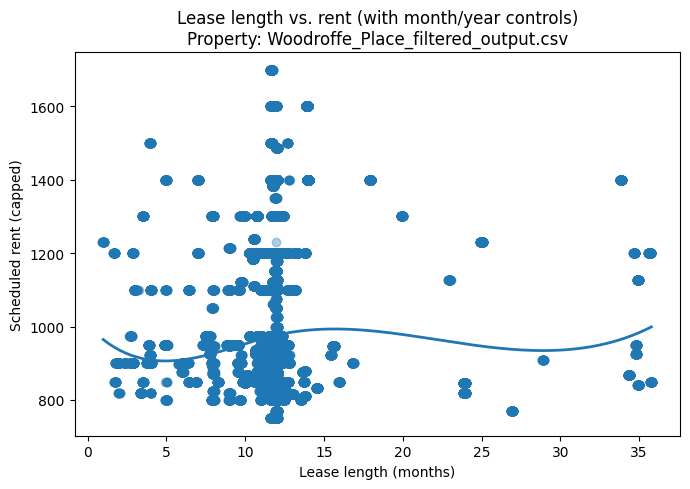

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
# Read all cleaned files
files = os.listdir("Properties_Cleaned_Rent")
for file in files:
    # Read property
    temp_df = pd.read_csv("Properties_Cleaned_Rent/"+file, low_memory=False)
    temp_df["Lease Start Date"] = pd.to_datetime(temp_df["Lease Start Date"], errors="coerce")
    temp_df["Lease End Date"] = pd.to_datetime(temp_df["Lease End Date"], errors="coerce")

    # Calculate lease length in months (note 365.25/ 12 = 30.4375 days per month)
    temp_df["Lease Length"] = (temp_df["Lease End Date"] - temp_df["Lease Start Date"]).dt.days / 30.4375

    temp_df["Lease Start Year"] = temp_df["Lease Start Date"].dt.year
    temp_df["Lease Start Month"] = temp_df["Lease Start Date"].dt.month

    temp_df["Scheduled Rent (Capped)"] = pd.to_numeric(temp_df["Scheduled Rent (Capped)"], errors="coerce")
    
    # Filter out rows with invalid lease lengths or rents
    temp_df = temp_df[(temp_df["Lease Length"].notna()) & (temp_df["Scheduled Rent (Capped)"] > 0)]
    temp_df = temp_df[(temp_df["Lease Length"] > 0) & (temp_df["Lease Length"] <= 36)]  # reasonable lease lengths (1-36 months)
    temp_df = temp_df[temp_df["Lease Start Month"].notna() & temp_df["Lease Start Year"].notna()]

    # Columns to keep
    cols_keep = ['Unit Space ID', 'Lease Start Date', 'Lease End Date', 'Lease Length', 'Lease Start Year', 'Lease Start Month', 'Scheduled Rent (Capped)']
    temp_df = temp_df[cols_keep].dropna()
    
    # Log transform and rename columns
    temp_df["Log Scheduled Rent"] = np.log(temp_df["Scheduled Rent (Capped)"])
    temp_df = temp_df.rename(columns={
        "Log Scheduled Rent": "log_rent",
        "Lease Length": "lease_length",
        "Lease Start Month": "start_month",
        "Lease Start Year": "start_year"
    })

    formula = "log_rent ~ bs(lease_length, df=4, include_intercept=False) + C(start_month) + C(start_year)"
    model = smf.ols(formula=formula, data=temp_df).fit(cov_type="HC1")
    print(f"Model summary for {file}:\n{model.summary()}\n")

    exog_names = model.model.exog_names
    bs_cols = [i for i, name in enumerate(exog_names) if name.startswith("bs(lease_length")]
    R = np.zeros((len(bs_cols), len(exog_names)))
    for r_i, col_idx in enumerate(bs_cols):
        R[r_i, col_idx] = 1.0
    wald = model.wald_test(R, use_f=True)
    wald_test_results = {
        "F": float(wald.fvalue),
        "df_num": int(wald.df_num),
        "df_denom": int(wald.df_denom),
        "p_value": float(wald.pvalue)
    }

    # Coefficient table
    coef_table = model.summary2().tables[1].reset_index().rename(columns={"index":"term"})
    x_grid = np.linspace(temp_df['lease_length'].min(), temp_df['lease_length'].max(), 200)
    # Build a frame holding typical month/year (use modal month/year)
    modal_month = int(temp_df['start_month'].mode().iloc[0])
    modal_year = int(temp_df['start_year'].mode().iloc[0])
    pred_df = pd.DataFrame({
        "lease_length": x_grid,
        "start_month": modal_month,
        "start_year": modal_year
    })
    pred_log = model.predict(pred_df)
    pred = np.exp(pred_log)

    # Plot
    plt.figure(figsize=(7,5))
    # scatter of observed (jittered)
    jitter = (np.random.rand(len(temp_df)) - 0.5) * 0.15
    plt.scatter(temp_df['lease_length'] + jitter, temp_df['Scheduled Rent (Capped)'], alpha=0.35)
    plt.plot(x_grid, pred, linewidth=2)
    plt.xlabel("Lease length (months)")
    plt.ylabel("Scheduled rent (capped)")
    plt.title(f"Lease length vs. rent (with month/year controls)\nProperty: {file}")
    plt.tight_layout()
    plt.show()


    

In [25]:
GoogleReviewStars = {
    "17Hundred": 3.5,
    "1Eleven": 3.8,
    "1Ten_on_Whyte": 4.2, 
    "308_King": 4.7,
    "417Nelson": 4.9,
    "ALMA_@_ByWard_Market": 4.0,  
    "ALMA_@_Guelph": 4.6,
    "ALMA_@_Oshawa": 3.8,
    "ALMA_@_Shaughnessy_Village": 3.8,
    "ALMA_Latin_Quartier": 5.0,
    "ALMA_Sandy_Hill": 4.2,
    "Bridgeport_House": 3.9,
    "Fergus_House": 4.1,
    "Hespeler_House": 4.0,
    "King_Street_Towers": 3.9,
    "MyRez_on_Lester": 4.1,
    "Preston_House": 4.0,
    "See-More": 4.7,
    "The_Arc": 4.0,
    "The_Quad_at_York_Phase_1": 3.6, 
    "The_Quad_at_York_Phase_2": 3.6,
    "West_Village_Suites": 3.1,
    "Woodroffe_Place": 3.9
}

In [26]:
files = os.listdir("Properties_Cleaned_Rent")

results = []
for file in files:
    temp_df = pd.read_csv("Properties_Cleaned_Rent/"+file, low_memory=False)
    
    # Convert dates
    temp_df["Event Date"] = pd.to_datetime(temp_df["Event Date"], errors="coerce")
    
    # Add Google review stars
    property_name = file.replace("_filtered_output", "").split('.')[0]
    # print(property_name)
    
    # Only use current users for rental income
    temp_df = temp_df[temp_df["Unit Status"].isin(["Occupied No Notice", "Notice Unrented", "Notice Rented"])]

    # Group by date
    daily_summary = temp_df.groupby('Event Date').agg(
        total_revenue=('Scheduled Rent (Capped)', 'sum'),
        all_units=('Unit Status', 'count')  # count of rows/units per day
    )
    daily_summary['AverageRevenue'] = daily_summary['total_revenue'] / daily_summary['all_units']

    avg_revenue_property = daily_summary['AverageRevenue'].mean()
    results.append({
        "PropertyName": property_name,
        "AvgRevenue": avg_revenue_property,
        "GoogleReviewStars": GoogleReviewStars.get(property_name, None)
    })

property_summary = pd.DataFrame(results)

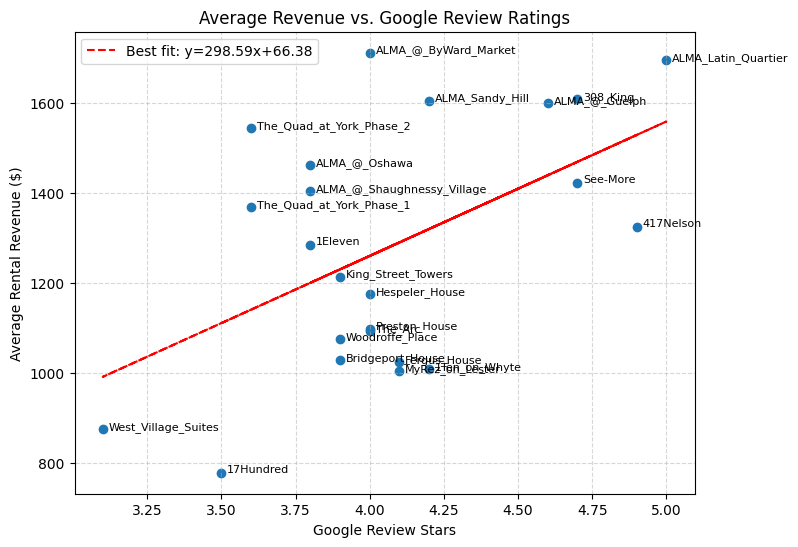

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(property_summary["GoogleReviewStars"], property_summary["AvgRevenue"])

# Labels
for i, row in property_summary.iterrows():
    plt.text(row["GoogleReviewStars"]+0.02, row["AvgRevenue"], row["PropertyName"], fontsize=8)

# Best-fit line
x = property_summary["GoogleReviewStars"]
y = property_summary["AvgRevenue"]

# Fit a straight line (degree=1 polynomial)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", linestyle="--", label=f"Best fit: y={m:.2f}x+{b:.2f}")

plt.xlabel("Google Review Stars")
plt.ylabel("Average Rental Revenue ($)")
plt.title("Average Revenue vs. Google Review Ratings")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


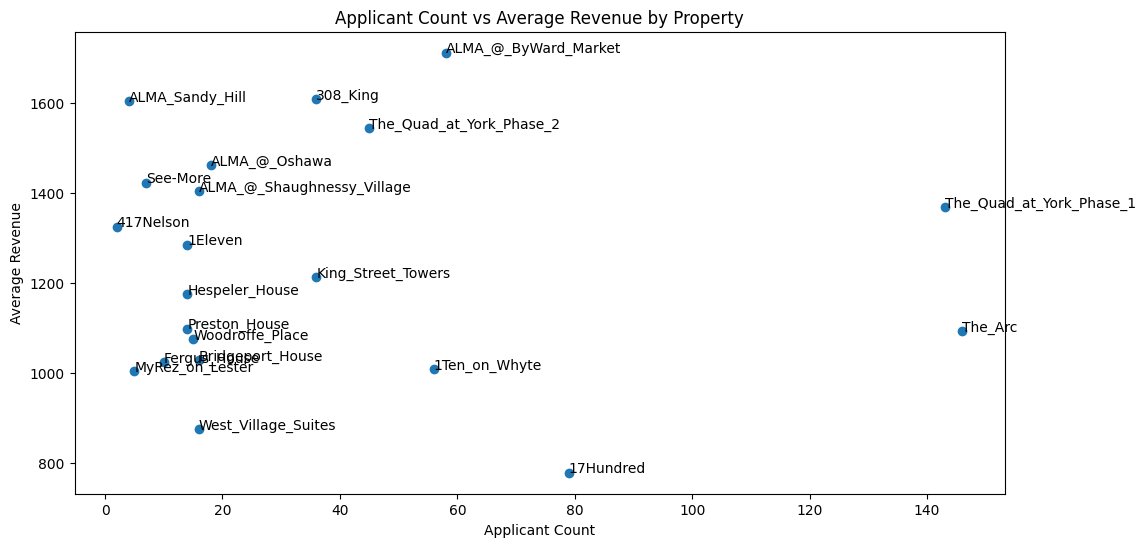

In [28]:
# Replace spaces with underscores in the property column
currentApplicantsdf = pd.read_csv("Current Applicants.csv")
currentApplicantsdf["Property"] = currentApplicantsdf["Property"].str.replace(" ", "_")

# Now count again
property_counts = currentApplicantsdf["Property"].value_counts()


property_counts_df = property_counts.reset_index()
property_counts_df.columns = ["PropertyName", "ApplicantCount"]
merged_df = pd.merge(property_counts_df, property_summary, on="PropertyName", how="left")

plt.figure(figsize=(12,6))
plt.scatter(merged_df["ApplicantCount"], merged_df["AvgRevenue"])

for i, txt in enumerate(merged_df["PropertyName"]):
    plt.annotate(txt, (merged_df["ApplicantCount"].iloc[i], merged_df["AvgRevenue"].iloc[i]))

plt.xlabel("Applicant Count")
plt.ylabel("Average Revenue")
plt.title("Applicant Count vs Average Revenue by Property")
plt.show()

In [ ]:
floors_per_building = {
    "17Hundred": 10, # divided up into 6 storeys and 4 storeys
    "1Eleven": 16,
    "1Ten_on_Whyte": 4,
    "308_King": 25,
    "417Nelson": 31,
    "ALMA_@_ByWard_Market": 15,
    "ALMA_@_Guelph": 7, # Two 7-storey buildings
    "ALMA_@_Oshawa": 9,
    "ALMA_@_Shaughnessy_Village": 18,
    "ALMA_Latin_Quartier": 3,
    "ALMA_Sandy_Hill": 6,
    "Bridgeport_House": 18,
    "Fergus_House": 21,
    "Hespeler_House": 21,
    "King_Street_Towers": 38, # two towers - one with 17 floors and one with 21 floors
    "MyRez_on_Lester": 18,
    "Preston_House": 17,
    "See-More": 16,
    "The_Arc": 15,
    "The_Quad_at_York_Phase_1": 7,
    "The_Quad_at_York_Phase_2": 6,
    "West_Village_Suites": 9,
    "Woodroffe_Place": 16
}

In [ ]:
building_counts = []
files = os.listdir("Properties")
for file in files:
    df_temp = pd.read_csv("Properties/"+file)
    df_temp = df_temp[df_temp["Scheduled Rent"] >= 0].dropna(subset=["Unit Space ID"])
    unique_amt = df_temp["Unit Space ID"].nunique()
    avg_rent = df_temp["Scheduled Rent"].mean()
    building_name = os.path.basename(file).replace("_filtered_output.csv", "")
    floors = floors_per_building[building_name]
    avg_units_per_floor = unique_amt / floors
    building_counts.append({"Building": building_name, "Count": unique_amt, "Floors": floors, "AvgRent": avg_rent, "Average Units Per Floor": avg_units_per_floor})

building_counts_df = pd.DataFrame(building_counts)
building_counts_df